<h1 align='center'> INF-280 Estadística Computacional 2023-1 </h1>

<H3 align='center'> Tema 3 - Ejemplos de Simulaciones  </H3>

# Ejemplo 1: 1 dado tradicional

Considere un dado tradicional de 6 caras que se lanza 1 vez.

1. Obtenga la f.d.p. teórica
2. Compare sus resultados teóricos con resultados obtenidos via simulación.

### 1) Teórica

Sea $x$ el número obtenido al lanzar el dado
$$
\begin{equation}
f(x)=
\begin{cases}
1/6 & \text{si $x \in [1,6]$} \\
0 & \text{si $x \notin [1,6]$} \\
\end{cases}
\end{equation}
$$

### 2) Mediante simulación.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import warnings
import random
warnings.filterwarnings("ignore")

In [4]:
numeros = [1,2,3,4,5,6]
simulaciones = 10**5

resultados_1 = {'x': [1,2,3,4,5,6], 'f(x) experimental': [0,0,0,0,0,0],
        'f(x) teórica':[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]}

for a in range(simulaciones):
    numero_al_azar = random.choice(numeros)
    resultados_1['f(x) experimental'][numero_al_azar-1] += 1

for a in range(0,6):
    resultados_1['f(x) experimental'][a] /= simulaciones

In [5]:
df_ej1 = pd.DataFrame(resultados_1)
df_ej1

,x,f(x) experimental,f(x) teórica
0,1,0.16853,0.166667
1,2,0.16839,0.166667
2,3,0.16542,0.166667
3,4,0.16737,0.166667
4,5,0.16625,0.166667
5,6,0.16404,0.166667


In [6]:
def dif_porcentual(n):
    #Columna con las diferencias porcentuales
    new_col = []

    #Se obtienen las diferencias porcentuales
    for a in range(len(n['x'])):
        dif = abs(np.round((n['f(x) experimental'][a] - n['f(x) teórica'][a])/n['f(x) teórica'][a] * 100,2))
        new_col.append(str(dif)+" %")
    
    #Se agrega la nueva columna al dataframe
    n["Diferencia porcentual"] = new_col

    #Se muestra el dataframe por pantalla
    display(n)

In [7]:
dif_porcentual(df_ej1)

,x,f(x) experimental,f(x) teórica,Diferencia porcentual
0,1,0.16853,0.166667,1.12 %
1,2,0.16839,0.166667,1.03 %
2,3,0.16542,0.166667,0.75 %
3,4,0.16737,0.166667,0.42 %
4,5,0.16625,0.166667,0.25 %
5,6,0.16404,0.166667,1.58 %


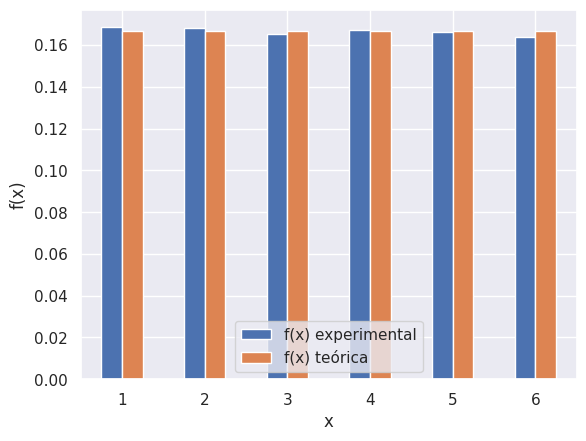

In [8]:
df_ej1.plot(x="x", y=["f(x) experimental", "f(x) teórica"], kind="bar", rot = 0, ylabel = 'f(x)')
plt.legend(loc = 'best')
plt.show()

**Observaciones**

* En la variable `resultados_1` se indican explicitamente los posibles valores que puede tomar la variable aleatoria **$X$**. Esto no siempre será posible, ya que en ocasiones estos valores podrían ser infinitos, o bien podrían depender de algún parámetro del problema a simular.
* En general, no nos interesa saber la frecuencia con que ocurre cada posible valor de **$X$**, sino que nos interesa conocer su **frecuencia relativa**. Por esto, fue que se divide la frecuencia por el número total de simulaciones. De esta manera, se **obtiene la probabilidad** de cada evento.
* Adicionalmente, se puede calcular la diferencia porcentual para ver que tan distintos fueron los resultados obtenidos via simulación en comparación a los teóricos.

# Ejemplo 2: Suma de N dados

Considere **$N$** dados tradicionales de 6 caras, los cuales se lanzan simultaneamente, donde se define la variable aleatoria **$X$** como la suma de los números obtenidos.

## 1) Teórica

Para obtener todos los posibles valores que puede tomar la suma de los numeros obtenidos al lanzar **$N$** dados, se tendrían contar todas las combinaciones posibles para obtener un valor $x_i$ y, a partir de eso, obtener su probabilidad.

In [9]:
from collections import Counter

def dice_sum_prob(N):
    # Crear un contador para almacenar el número de ocurrencias de cada suma
    counter = Counter()

    def dice_sum_helper(dice_left, current_sum):
        if dice_left == 0:
            counter[current_sum] += 1
        else:
            for i in range(1, 7):
                dice_sum_helper(dice_left - 1, current_sum + i)

    # Llamar a la función auxiliar para calcular las sumas posibles
    dice_sum_helper(N, 0)

    # Calcular la función de probabilidad dividiendo el número de ocurrencias por el total de posibilidades
    total_possibilities = 6 ** N
    probability = {sum_value: count / total_possibilities for sum_value, count in counter.items()}
    return probability

In [10]:
# Ejemplo de uso:
N = 10  # Número de veces que se lanza el dado
fdp = dice_sum_prob(N)

eje_x = fdp.keys()
eje_y = fdp.values()

df_ej2_teo  = pd.DataFrame({'x': eje_x, 'f(x) teórica': eje_y})
df_ej2_teo.head(10)

,x,f(x) teórica
0,10,1.653817e-08
1,11,1.653817e-07
2,12,9.095994e-07
3,13,3.638398e-06
4,14,1.182479e-05
5,15,3.310942e-05
6,16,8.260817e-05
7,17,1.875429e-04
8,18,3.929470e-04
9,19,7.677019e-04


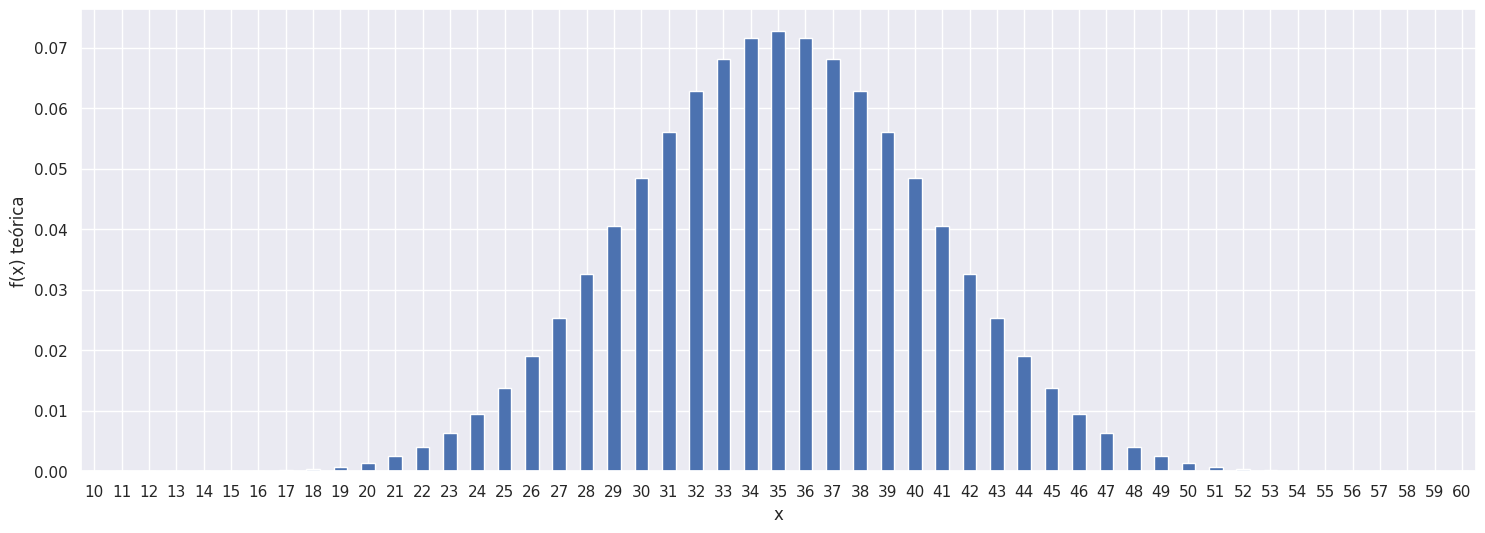

In [11]:
#Grafico
df_ej2_teo.plot(x="x", y= 'f(x) teórica', kind="bar", rot = 0, figsize=(18, 6), legend = False, ylabel = "f(x) teórica")
plt.show()

## 2) Mediante simulación.

In [12]:
N = 10
numeros = [1,2,3,4,5,6]
simulaciones = 10**6

sumas_dados = []

for a in range(simulaciones):
    #Se "lanzan" los N dados al mismo tiempo
    numeros_elegidos = np.random.choice(numeros, size = N)
    
    #Se suman los resultados de los N dados
    suma = sum(numeros_elegidos)

    #Se registra la suma de los N dados
    sumas_dados.append(suma)

resultados_ej2 = {'x': [], 'f(x) experimental': []}

for suma in set(sumas_dados):
    frecuencia = sumas_dados.count(suma)
    frecuencia_relativa = frecuencia/simulaciones

    resultados_ej2['x'].append(suma)
    resultados_ej2['f(x) experimental'].append(frecuencia_relativa)

df_ej2_sim = pd.DataFrame(resultados_ej2)
df_ej2_sim.head(10)

,x,f(x) experimental
0,11,0.000001
1,12,0.000003
2,13,0.000005
3,14,0.000018
4,15,0.000024
5,16,0.000085
6,17,0.000184
7,18,0.000395
8,19,0.000823
9,20,0.001340


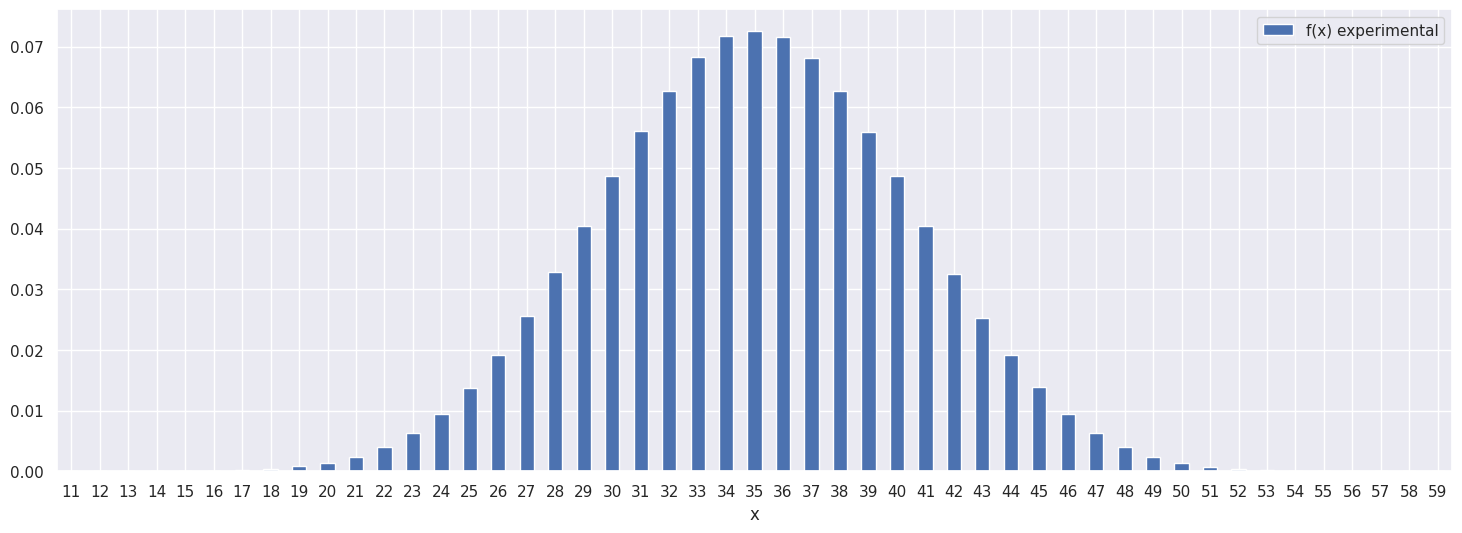

In [13]:
df_ej2_sim.plot(x="x", y= 'f(x) experimental', kind="bar", rot = 0, figsize=(18, 6))
plt.show()

# Simulaciones más rápidas.

Como se ha observado, se requiere una gran cantidad de simulaciones para poder estimar las probabilidades teóricas con una buena precisión. Por esto, surge la necesidad de optimizar el código para reducir el tiempo de ejecución. Una manera de lograr esto es utilizando las funciones de la librería `numpy`, ya que NumPy está diseñado para realizar cálculos eficientes en arreglos de datos numéricos. Donde utiliza estructuras de datos optimizadas y funciones vectorizadas que aprovechan la capacidad de cómputo paralelo de las CPU modernas. Esto resulta en un rendimiento mucho mejor en comparación con el uso de bucles explícitos en Python puro.

Para comparar la velocidad entre usar o no Numpy, veremos el Ejemplo 1 de lanzar un dado tradicional.

## 1) Ejemplo 1 sin numpy

In [14]:
#%%timeit
numeros = [1,2,3,4,5,6]
simulaciones = 10**7

resultados_1_sinNP = {'x': [1,2,3,4,5,6], 'f(x) experimental': [0,0,0,0,0,0],
        'f(x) teórica':[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]}

for a in range(simulaciones):
    numero_al_azar = random.choice(numeros)
    resultados_1_sinNP['f(x) experimental'][numero_al_azar-1] += 1

for a in range(0,6):
    resultados_1_sinNP['f(x) experimental'][a] /= simulaciones

In [15]:
df_ej1_sinNP = pd.DataFrame(resultados_1_sinNP)
dif_porcentual(df_ej1_sinNP)

,x,f(x) experimental,f(x) teórica,Diferencia porcentual
0,1,0.166735,0.166667,0.04 %
1,2,0.166453,0.166667,0.13 %
2,3,0.166581,0.166667,0.05 %
3,4,0.167021,0.166667,0.21 %
4,5,0.166591,0.166667,0.05 %
5,6,0.166620,0.166667,0.03 %


## 2) Ejemplo 1 con numpy

In [19]:
#%%timeit

numeros = np.array([1, 2, 3, 4, 5, 6])
simulaciones = 10**8

resultados_1_conNP = {'x': numeros, 'f(x) experimental': np.zeros(6), 'f(x) teórica': np.full(6, 1/6)}

lanzamientos = np.random.choice(numeros, simulaciones)
frecuencias = np.bincount(lanzamientos - 1, minlength=6) / simulaciones

resultados_1_conNP['f(x) experimental'] = frecuencias

In [17]:
df_ej1_conNP = pd.DataFrame(resultados_1_conNP)
dif_porcentual(df_ej1_conNP)

,x,f(x) experimental,f(x) teórica,Diferencia porcentual
0,1,0.166698,0.166667,0.02 %
1,2,0.166632,0.166667,0.02 %
2,3,0.166625,0.166667,0.03 %
3,4,0.166698,0.166667,0.02 %
4,5,0.166698,0.166667,0.02 %
5,6,0.166649,0.166667,0.01 %
